# Final Micro Project

The time has come to apply what you have learned throughout the course by doing a micro project. 

## Arctic Sea Ice

### Data
* In this project you are offered to use NOAA/NSIDC Climate Data Record of Passive Microwave Sea Ice Concentration.
* In the `../data/` directory, there are 2 netCDF files `seaice_conc_monthly*` that correspond to September 1991 ([original FTP link](ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_v2/north/monthly/seaice_conc_monthly_nh_f08_199109_v02r00.nc)) and September 2012 ([original FTP link](ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_v2/north/monthly/seaice_conc_monthly_nh_f17_201209_v02r00.nc)).
* If you want to download data for other months, visit the [NSIDC's data portal](https://nsidc.org/data/search/#keywords=sea+ice/sortKeys=score,,desc/facetFilters=%257B%257D/pageNumber=1/itemsPerPage=25).

### Ideas for the project
* Plot one of the time slices on a map with North Polar Stereographic projection
* Create a figure with 3 subplots
* Plot the 1991 sea ice concentration in the 1st subplot, 2012 sea ice in the 2nd, and the difference in the 3rd.

### Getting started

For this project, we recommend that you:
* use `xarray` for opening and reading the netCDF files
* may use `xarray.open_mf_dataset()` to load both files at once
* use `cartopy` for creating a plot with a correct map projection
* use appropriate colormaps for the sea ice concentration and difference

To get started, copy the following cell into your **Project** notebook.

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature # for plotting land and coastlines
import matplotlib.pyplot as plt
import xarray as xr

We can choose to open several files at once using open_mfdataset (required Dask package to be installed) or use open_dataset one file at a time.


In [2]:
ds = xr.open_mfdataset('../../data/seaice_conc_monthly_*.nc',combine='by_coords')
## or
#ds1 = xr.open_dataset('../../data/seaice_conc_monthly_nh_f08_199109_v02r00.nc')
#ds2 = xr.open_dataset('../../data/seaice_conc_monthly_nh_f17_201209_v02r00.nc')

C:\Users\tams00\AppData\Local\Continuum\anaconda3\envs\course2020\lib\site-packages\xarray\conventions.py:487: SerializationWarning: variable 'melt_onset_day_seaice_conc_monthly_cdr' has multiple fill values {-1, 65535}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [3]:
# Uncomment to inspect the Dataset object
#ds

In [4]:
#Variables in the files
ds.data_vars

Data variables:
    projection                              (time) |S1 b'' b''
    seaice_conc_monthly_cdr                 (time, ygrid, xgrid) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    stdev_of_seaice_conc_monthly_cdr        (time, ygrid, xgrid) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    melt_onset_day_seaice_conc_monthly_cdr  (time, ygrid, xgrid) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    qa_of_seaice_conc_monthly_cdr           (time, ygrid, xgrid) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    goddard_merged_seaice_conc_monthly      (time, ygrid, xgrid) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    goddard_nt_seaice_conc_monthly          (time, ygrid, xgrid) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>
    goddard_bt_seaice_conc_monthly          (time, ygrid, xgrid) float32 dask.array<chunksize=(1, 448, 304), meta=np.ndarray>

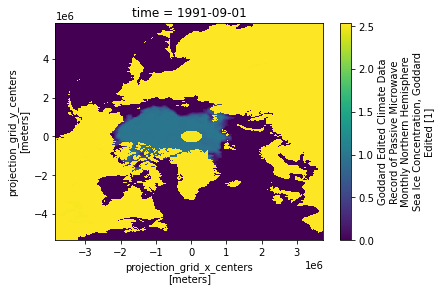

In [5]:
## Extract longitude and latitude values, then the sea ice concentration itself
lat = ds['latitude']
lon = ds['longitude']

# There are several variables available in the file
# I have chosen this one
sic = ds['goddard_merged_seaice_conc_monthly']

# Lets select the time period
sic1991 = sic.sel(time = '1991-09-01')
sic2012 = sic.sel(time = '2012-09-01')

#This could alos have been done by index
# but would have been less explicit
#sic1991 = sic.isel(time = 0)
#sic2012 = sic.isel(time = 1)


# Plot data as it is gridded in the file
sic1991.plot()

#Uncomment to see how longitude is in the file
#lon.plot()

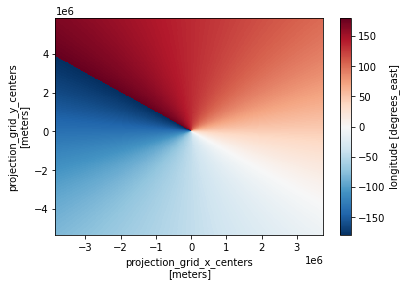

In [6]:
# Let's see how longitude is organised in the file
lon.plot()

Now that we have the data, let's make one map using [pcolormesh()](http://xarray.pydata.org/en/v0.15.1/generated/xarray.plot.pcolormesh.html)
This is Cartopy's equivalent of plt.pcolormesh which uses quadrilateral to represent "non-regular rectangular grids". It will warp the original grid to match our choice of projection.

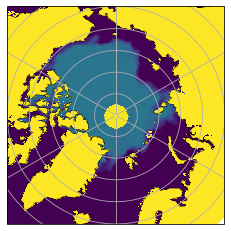

In [7]:
# Code for creating a map
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.NorthPolarStereo(central_longitude=0))

ax.coastlines(resolution='110m', linewidth=0.5)
# transform=PlateCarre is used to denote the geographical
# coordinates lat and lon
ax.pcolormesh(lon,lat,sic1991,transform=ccrs.PlateCarree())

ax.gridlines()
ax.set_extent([-180, 180, 65, 90], crs=ccrs.PlateCarree())

To avoid repeating ourselves, we wil create a function "onepanel" that will be invoqued to create the three similar panels. 

NaturalEarth Feature datyabase will be used for land mask. Resolution "110m" will be used used, but you can try "50m" or even "10m" to see if you notice any difference. 

In [8]:
def onepanel(ax,lon,lat,data):

    cm = ax.pcolormesh(lon,lat,data,
                       transform=ccrs.PlateCarree(),
                       cmap='bone',   # colormap bone goes from black to white
                       vmin=0,
                       vmax=1.0,   # sea ice concentration given in fraction [0,1]
                      )
                       
    # A verbose way to add a coastline and land mask
    land = cfeature.NaturalEarthFeature(
                            'physical', 'land', '110m',
                            edgecolor='black',
                            facecolor=cfeature.COLORS['land'])
    ax.add_feature(land)

    ax.gridlines()
    ax.set_extent([-180, 180, 65, 90], crs=ccrs.PlateCarree())
    
    return ax

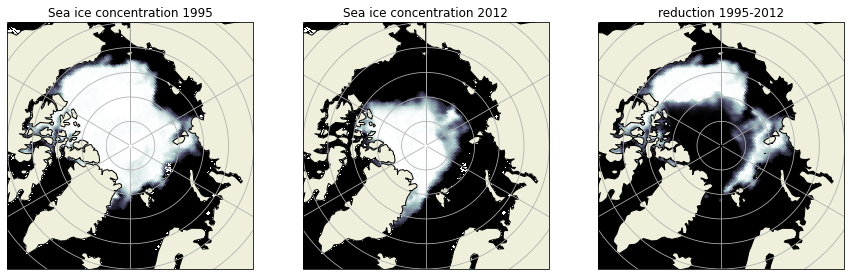

In [9]:
# Code for creating a three maps

fig,axs = plt.subplots(
            ncols=3,
            figsize=(15,5),
            subplot_kw={'projection':ccrs.NorthPolarStereo(central_longitude=0)}
            )

ax = onepanel(axs[0],lon,lat,sic1991)    
ax.set_title('Sea ice concentration 1995')

ax = onepanel(axs[1],lon,lat,sic2012)    
ax.set_title('Sea ice concentration 2012')

ax = onepanel(axs[2],lon,lat,sic1991-sic2012)    
ax.set_title('reduction 1995-2012');



In [10]:
# To save figure to file uncomment this  
# fig.savefig('sea_ice_comparison.png',dpi=200)